In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Questions of focus:
# Q44_1 - 44_3: 
# Indicate how much you agree or disagree with the statements below:
# I think CS is an interesting field of study
# I like CS
# When I think about CS I get bored
# Rank 0-7 (Disagree - Agree)

In [3]:
# Read in data

S1 = pd.read_csv('../CleanedData/S1_all.csv')
S2 = pd.read_csv('../CleanedData/S2_all.csv')
pd.set_option('max_columns', None, 'max_rows', None)

In [4]:
# Print plots to compare test/control: Q44

                # df        df         str        str
def plotCSInterest(survey1, survey2, question, statement):
    
    title = question + ' (Scale 0-7):\n' + statement

    testS1 = survey1[survey1.Group == 'Test']
    testS2 = survey2[survey2.Group == 'Test']
    conS1 = survey1[survey1.Group == 'Control']
    conS2 = survey2[survey2.Group == 'Control']
    
    total_testS1 = len(testS1) if (len(testS1) > 0) else 1
    total_conS1 = len(conS1) if (len(conS1) > 0) else 1
    total_testS2 = len(testS2) if (len(testS2) > 0) else 1
    total_conS2 = len(conS2) if (len(conS2) > 0) else 1

    # Create dictionaries of value counts
    tS1Dict = testS1[question].value_counts().to_dict()
    cS1Dict = conS1[question].value_counts().to_dict()
    tS2Dict = testS2[question].value_counts().to_dict()
    cS2Dict = conS2[question].value_counts().to_dict()

    # Check dictionaries have proper keys
    dicts = [tS1Dict, cS1Dict, tS2Dict, cS2Dict]
    key_list = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
    for i in range(len(dicts)):
        for j in range(len(key_list)):
            if key_list[j] not in dicts[i]:
                dicts[i][key_list[j]] = 0
    

    # Get percentages of test and control
    S1Data = [[tS1Dict[0.0] / total_testS1 * 100, tS1Dict[1.0] / total_testS1 * 100,
               tS1Dict[2.0] / total_testS1 * 100, tS1Dict[3.0] / total_testS1 * 100,
               tS1Dict[4.0] / total_testS1 * 100, tS1Dict[5.0] / total_testS1 * 100,
               tS1Dict[6.0] / total_testS1 * 100, tS1Dict[7.0] / total_testS1 * 100],
              [cS1Dict[0.0] / total_conS1 * 100, cS1Dict[1.0] / total_conS1 * 100,
               cS1Dict[2.0] / total_conS1 * 100, cS1Dict[3.0] / total_conS1 * 100,
               cS1Dict[4.0] / total_conS1 * 100, cS1Dict[5.0] / total_conS1 * 100,
                cS1Dict[6.0] / total_conS1 * 100, cS1Dict[7.0] / total_conS1 * 100]]
    S2Data = [[tS2Dict[0.0] / total_testS2 * 100, tS2Dict[1.0] / total_testS2 * 100,
               tS2Dict[2.0] / total_testS2 * 100, tS2Dict[3.0] / total_testS2 * 100,
               tS2Dict[4.0] / total_testS2 * 100, tS2Dict[5.0] / total_testS2 * 100,
               tS2Dict[6.0] / total_testS2 * 100, tS2Dict[7.0] / total_testS2 * 100],
               [cS2Dict[0.0] / total_conS2 * 100, cS2Dict[1.0] / total_conS2 * 100,
                cS2Dict[2.0] / total_conS2 * 100, cS2Dict[3.0] / total_conS2 * 100,
                cS2Dict[4.0] / total_conS2 * 100, cS2Dict[5.0] / total_conS2 * 100,
                cS2Dict[6.0] / total_conS2 * 100, cS2Dict[7.0] / total_conS2 * 100]]
    
    # Data for altair plots
    print('S1: ', S1Data) 
    print('S2: ', S2Data)

    # Plot
    
    # Get max value to set y limit
    max_val = max([max(tS1Dict.values()) / total_testS1 * 100, max(cS1Dict.values()) / total_conS1 * 100, 
                  max(tS2Dict.values()) / total_testS2 * 100, max(cS2Dict.values()) / total_conS2 * 100])
    
    X = np.arange(8)
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.suptitle(title, x=1, y=1.15)

    # survey 1
    ax[0] = fig.add_axes([0,0,1,1])
    ax[0].set_ylim([0,max_val+2])
    ax[0].bar(X + 0.0, S1Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[0].bar(X + 0.2, S1Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[0].set_title('Survey 1')
    ax[0].set_xticks(X + 0.2)
    ax[0].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])
    ax[0].set_ylabel('% Students')
    ax[0].legend(loc='best')

    # survey 2
    ax[1] = fig.add_axes([1.1,0,1,1])
    ax[1].set_ylim([0,max_val+2])
    ax[1].bar(X + 0.0, S2Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[1].bar(X + 0.2, S2Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[1].set_title('Survey 2')
    ax[1].set_xticks(X + 0.2)
    ax[1].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])
    ax[1].set_ylabel('% Students')
    ax[1].legend(loc='best')


S1:  [[0.0, 0.0, 4.3478260869565215, 14.492753623188406, 13.043478260869565, 17.391304347826086, 26.08695652173913, 18.84057971014493], [0.0, 4.032258064516129, 1.6129032258064515, 10.483870967741936, 14.516129032258066, 9.67741935483871, 25.0, 34.67741935483871]]
S2:  [[0.0, 1.4492753623188406, 4.3478260869565215, 5.797101449275362, 10.144927536231885, 17.391304347826086, 18.84057971014493, 34.78260869565217], [0.8064516129032258, 4.838709677419355, 2.4193548387096775, 5.64516129032258, 12.903225806451612, 15.32258064516129, 17.741935483870968, 33.87096774193548]]


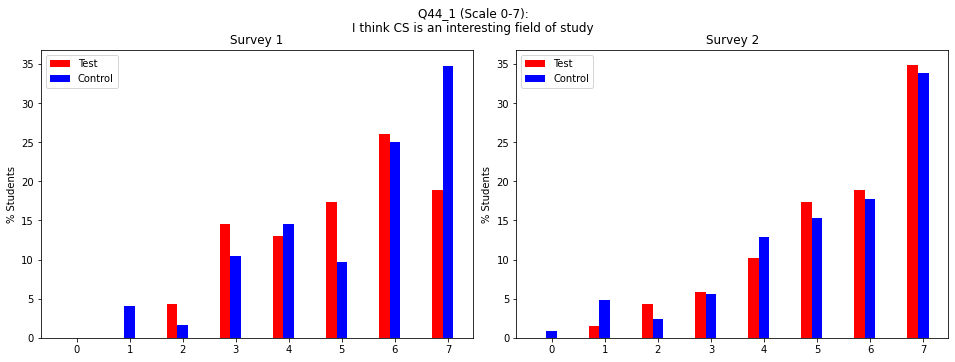

In [5]:
plotCSInterest(S1, S2, 'Q44_1', 'I think CS is an interesting field of study')

In [6]:
S1_44_1 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [0.0, 0.0, 4.3478260869565215, 14.492753623188406, 13.043478260869565, 17.391304347826086, 26.08695652173913, 18.84057971014493,
                                    0.0, 4.032258064516129, 1.6129032258064515, 10.483870967741936, 14.516129032258066, 9.67741935483871, 25.0, 34.67741935483871]})

S2_44_1 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [0.0, 1.4492753623188406, 4.3478260869565215, 5.797101449275362, 10.144927536231885, 17.391304347826086, 18.84057971014493, 34.78260869565217,
                                    0.8064516129032258, 4.838709677419355, 2.4193548387096775, 5.64516129032258, 12.903225806451612, 15.32258064516129, 17.741935483870968, 33.87096774193548]})

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_44_1).mark_bar().encode(
    column='Ranking',
    x='Group',
    y=alt.Y('%Students:Q', title='Percent of Students'),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 1', )

chart2 = alt.Chart(S2_44_1).mark_bar().encode(
    column='Ranking',
    x='Group',
    y=alt.Y('%Students:Q', title='Percent of Students'),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 2+')


chart1 | chart2
  

alt.HConcatChart(...)

S1:  [[0.0, 8.695652173913043, 5.797101449275362, 23.18840579710145, 15.942028985507244, 17.391304347826086, 11.594202898550725, 8.695652173913043], [0.0, 4.032258064516129, 8.870967741935484, 16.129032258064516, 16.93548387096774, 20.967741935483872, 10.483870967741936, 19.35483870967742]]
S2:  [[2.898550724637681, 1.4492753623188406, 20.28985507246377, 5.797101449275362, 14.492753623188406, 14.492753623188406, 15.942028985507244, 15.942028985507244], [1.6129032258064515, 8.870967741935484, 7.258064516129033, 11.29032258064516, 16.93548387096774, 15.32258064516129, 13.709677419354838, 16.93548387096774]]


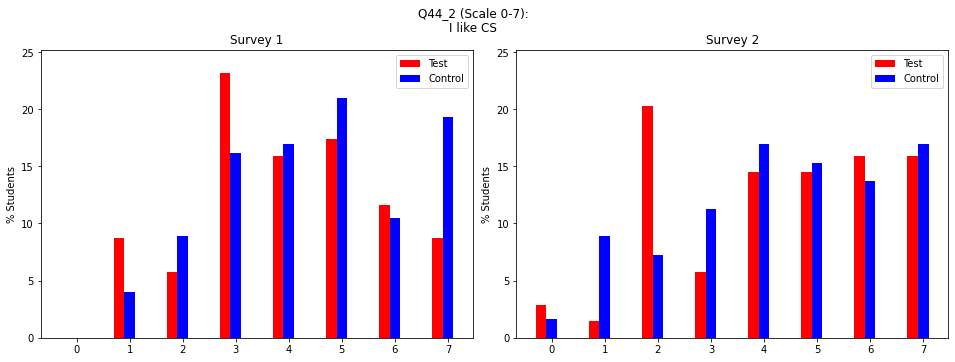

In [7]:
plotCSInterest(S1, S2, 'Q44_2', 'I like CS')

In [8]:
S1_44_2 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [0.0, 8.695652173913043, 5.797101449275362, 23.18840579710145, 15.942028985507244, 17.391304347826086, 11.594202898550725, 8.695652173913043,
                                     0.0, 4.032258064516129, 8.870967741935484, 16.129032258064516, 16.93548387096774, 20.967741935483872, 10.483870967741936, 19.35483870967742]})

S2_44_2 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [2.898550724637681, 1.4492753623188406, 20.28985507246377, 5.797101449275362, 14.492753623188406, 14.492753623188406, 15.942028985507244, 15.942028985507244,
                                     1.6129032258064515, 8.870967741935484, 7.258064516129033, 11.29032258064516, 16.93548387096774, 15.32258064516129, 13.709677419354838, 16.93548387096774]})

y_min = 0
y_max = 24

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_44_2).mark_bar().encode(
    column='Ranking',
    x='Group',
    y='%Students',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 1', )

chart2 = alt.Chart(S2_44_2).mark_bar().encode(
    column='Ranking',
    x='Group',
    y='%Students',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 2+')

chart1 = chart1.encode(alt.Y('%Students', title='Percent of Students', scale=alt.Scale(domain=[y_min, y_max])))
chart2 = chart2.encode(alt.Y('%Students', title='Percent of Students', scale=alt.Scale(domain=[y_min, y_max])))

chart1 | chart2

  

alt.HConcatChart(...)

S1:  [[4.3478260869565215, 18.84057971014493, 14.492753623188406, 27.536231884057973, 15.942028985507244, 4.3478260869565215, 0.0, 4.3478260869565215], [12.096774193548388, 16.93548387096774, 28.225806451612907, 9.67741935483871, 12.096774193548388, 10.483870967741936, 0.0, 5.64516129032258]]
S2:  [[5.797101449275362, 23.18840579710145, 23.18840579710145, 4.3478260869565215, 20.28985507246377, 4.3478260869565215, 1.4492753623188406, 2.898550724637681], [9.67741935483871, 22.58064516129032, 18.548387096774192, 12.903225806451612, 10.483870967741936, 8.870967741935484, 4.032258064516129, 0.8064516129032258]]


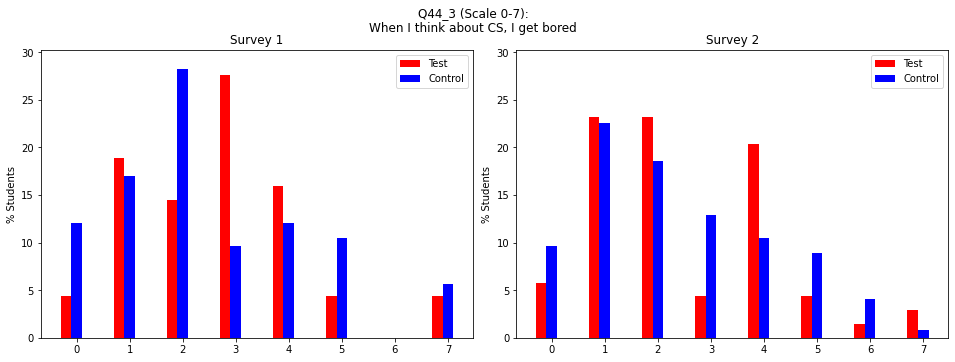

In [9]:
plotCSInterest(S1, S2, 'Q44_3', 'When I think about CS, I get bored')

In [10]:
S1_44_3 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [4.3478260869565215, 18.84057971014493, 14.492753623188406, 27.536231884057973, 15.942028985507244, 4.3478260869565215, 0.0, 4.3478260869565215,
                        12.096774193548388, 16.93548387096774, 28.225806451612907, 9.67741935483871, 12.096774193548388, 10.483870967741936, 0.0, 5.64516129032258]})

S2_44_3 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       '%Students': [5.797101449275362, 23.18840579710145, 23.18840579710145, 4.3478260869565215, 20.28985507246377, 4.3478260869565215, 1.4492753623188406, 2.898550724637681,
                        9.67741935483871, 22.58064516129032, 18.548387096774192, 12.903225806451612, 10.483870967741936, 8.870967741935484, 4.032258064516129, 0.8064516129032258]})

y_min = 0
y_max = 30

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_44_3).mark_bar().encode(
    column='Ranking',
    x='Group',
    y='%Students',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 1', )

chart2 = alt.Chart(S2_44_3).mark_bar().encode(
    column='Ranking',
    x='Group',
    y='%Students',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).properties(title='Survey 2+')

chart1 = chart1.encode(alt.Y('%Students', title='Percent of Students', scale=alt.Scale(domain=[y_min, y_max])))
chart2 = chart2.encode(alt.Y('%Students', title='Percent of Students', scale=alt.Scale(domain=[y_min, y_max])))

chart1 | chart2


alt.HConcatChart(...)